# Assignment 5.2

author: Rachel Nelson

class: DSC650

## Assignment 5.2
Implement the news classifier found in section 3.5 of Deep Learning with Python.

In [20]:
#3.12 Loading the Reuters dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

len(train_data)
len(test_data)

train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [21]:
#  3.13 Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

train_labels[10]

3

In [22]:
# 3.14 Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [23]:
# 3.15 Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [24]:
# 3.16 Compiling the modeL
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
#  3.17 Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [26]:
# 3.18 Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 2.6140 - accuracy: 0.5167 - val_loss: 1.7132 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4213 - accuracy: 0.7068 - val_loss: 1.2859 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0481 - accuracy: 0.7799 - val_loss: 1.1409 - val_accuracy: 0.7470

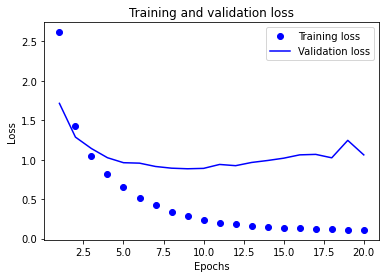

In [27]:
#  3.19 Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

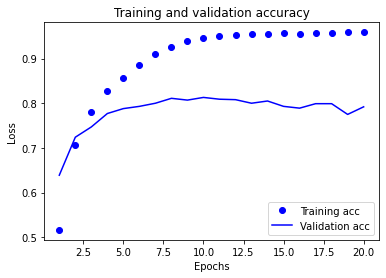

In [28]:
#  3.20 Plotting the training and validation accuracy
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [29]:
#  3.21 Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
              partial_y_train,
              epochs=8,
              batch_size=512,
              validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

results

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)


Epoch 1/8
16/16 [==============================] - 1s 21ms/step - loss: 2.6448 - accuracy: 0.5233 - val_loss: 1.7540 - val_accuracy: 0.6290
Epoch 2/8
16/16 [==============================] - 0s 13ms/step - loss: 1.4492 - accuracy: 0.6954 - val_loss: 1.3225 - val_accuracy: 0.7160
Epoch 3/8
16/16 [==============================] - 0s 14ms/step - loss: 1.0646 - accuracy: 0.7734 - val_loss: 1.1355 - val_accuracy: 0.7500

0.195013357079252

In [30]:
#  3.22 Retraining a model from scratch
predictions = model.predict(x_test)

predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [31]:
# 3.23 A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 3.2372 - accuracy: 0.3355 - val_loss: 2.6886 - val_accuracy: 0.3520
Epoch 2/20
63/63 [==============================] - 1s 7ms/step - loss: 2.3230 - accuracy: 0.4213 - val_loss: 2.0128 - val_accuracy: 0.5320